## Visualization of FunGen-xQTL AD Loci Table
Author: Alexandre Pelletier and Jenny Empawi

### Motivation
Create an information visualization summarizing key information from the comprehensive AD loci table.

### Implementation
Generate one figure to highlight the most critical insights from the AD loci table. Possible information to include: effect size direction for AD risk variants wrt xQTL

### Load libraries

In [101]:
library(ggtext)
library(showtext)
font_add_google("Noto Sans", "Noto Sans")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



In [37]:
out <- '/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6'  #FIXME
source('/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6/gene_prio_utils.R') #FIXME

### Load result

In [97]:
#update table figure
res_adx <- fread(fp(out,'res_allanalysis_ADloci_overlap.csv')) #FIXME

#add the confidence level
#res_adxub<-fread(fp(out,'res_AD_variants_xQTL.csv.gz'))  #FIXME
res_adx[,top_confidence:=str_extract(xQTL_effects,'C[0-9]')]


#xQTL evidence summary dot plot at locus level
#for each QTL evidence type put in 3 cat : absent, present, high, 
#for fp: high if cs95, coloc : high if npc > 0.95, TWAS: MR
table(res_adx$Method)
table(res_adx$context_short)
table(res_adx$context)

#group contexts better: 
res_adx[,locus_gene:=paste(locus_index,ifelse(gene_name=='','?',gene_name),sep='_')]


       AD_GWAS_finemapping     AD_meta_colocalization 
                      6552                       7825 
    AD_xQTL_colocalization           APOE interaction 
                    142480                       2661 
                     Coloc                         QR 
                      5657                     223262 
                   TWAS/MR                      cTWAS 
                      2670                        117 
        fSuSiE_finemapping           msex interaction 
                     37369                         12 
 multi_context_finemapping     multi_gene_finemapping 
                    102549                      69355 
single_context_finemapping                    sn_sQTL 
                   1479052                     227297 
         trans_finemapping 
                    173677 


  Ast caQTL    Ast eQTL    Ast sQTL           B    Exc eQTL    Exc sQTL 
          7      120179       12744       10551      156572      162545 
   Inh eQTL    Inh sQTL           J           K   Mic caQTL    Mic eQTL 
     157924       24492         672        1118          12       62232 
   Mic sQTL    OPC eQTL    OPC sQTL    Oli eQTL    Oli sQTL           W 
          2       95833        8720      146037       18794       40897 
  bMac eQTL   bMic eQTL  bMono eQTL   bulk eQTL  bulk gpQTL  bulk haQTL 
      64755       46488       33658      863034       16770         657 
  bulk mQTL bulk p-sQTL   bulk pQTL   bulk sQTL bulk u-sQTL 
      42350      175552       25353      166250       26337 


                        AC_DeJager_eQTL                      AD_Bellenguez_2022 
                                 130242                                    8517 
                AD_Bellenguez_EADB_2022                 AD_Bellenguez_EADI_2022 
                                   2017                                      17 
                         AD_Jansen_2021                   AD_Kunkle_Stage1_2019 
                                    672                                    1118 
      AD_Wightman_Excluding23andMe_2021 AD_Wightman_ExcludingUKBand23andME_2021 
                                  22223                                   15493 
                  AD_Wightman_Full_2021                      Ast_10_Kellis_eQTL 
                                   3181                                   20948 
                       Ast_DeJager_eQTL                         Ast_Kellis_eQTL 
                                  64726                                   19054 
                          A

In [41]:
#Genome wide signif hits
res_adx[,genomewide_sig_loc:=any(min_pval<5e-8),by='locus_gene']

#get at locus level
res_adxloc <- unique(res_adx[!context_short%in%c('B','J','K','W')][order(locus_gene,confidence_lvl,cV2F_rank)],by=c('locus_gene','context'))
res_adxlocf <- res_adxloc[(genomewide_sig_loc)]
res_adxlocf[gene_name!='',n.study.gene.locus:=length(unique(context)),by=.(gene_name,locus_index)]
res_adxlocf[gene_name!='',top_gene:=gene_name==gene_name[order(confidence_lvl,-n.study.gene.locus,cV2F_rank)][1],by=.(locus_index)]

res_adxlocfge <- res_adxlocf[context_short!=''][order(locus_index,-cV2F_rank)][(top_gene)]
unique(res_adxlocfge$locus_index)|>length() #95
unique(res_adxlocfge$gene_name)|>length()#83

res_adxlocfge[,chr:=seqid(variant_ID[!is.na(variant_ID)][1],only_num = T),by=.(locus_index)]
res_adxlocfge[is.na(chr),chr:=`#chr`]


[1] 95

[1] 83

In [98]:
# group some contexts
res_adxlocfge[,context_group:=ifelse(context_short%in%c('bMono eQTL','bMac eQTL','bMic eQTL'),'Immune eQTL',
                                     ifelse(context_short%in%c( 'bulk p-sQTL','bulk u-sQTL','bulk a-sQTL'),'bulk sQTL',
                                     ifelse(context_short%in%c('bulk pQTL','bulk gpQTL'),'bulk (g)pQTL',
                                            ifelse(context_short%in%c('bulk haQTL','bulk mQTL'),'bulk epiQTL',as.character(context_short)))))]


unique(res_adxlocfge$context_group)
contexts_order<-c('Exc eQTL','Exc sQTL',
                  'Inh eQTL','Inh sQTL',
                  'Oli eQTL','Oli sQTL',
                  'OPC eQTL',
                  'Ast eQTL','Ast caQTL',
                  'Mic eQTL','Mic caQTL',
                  'Immune eQTL',
                  'bulk eQTL',
                  'bulk sQTL',
                  'bulk (g)pQTL',
                  'bulk epiQTL')

res_adxlocfge[,context_group:=factor(context_group,levels = contexts_order)]

unique(res_adxlocfge[order(confidence_lvl)],by='gene_name')$confidence_lvl|>table()


[1] "bulk eQTL"    "Oli eQTL"     "bulk epiQTL"  "Immune eQTL"  "Mic eQTL"    
 [6] "bulk (g)pQTL" "Ast eQTL"     "Exc eQTL"     "Inh eQTL"     "OPC eQTL"    
[11] "bulk sQTL"    "Exc sQTL"     "Inh sQTL"     "Mic caQTL"    "Ast sQTL"    
[16] "Oli sQTL"     "Ast caQTL"


CL1 CL2 CL3 CL4 CL5 CL6 
 25   6  13  10  19  10 

In [99]:
# summarize using confidence score  and nstudy
res_adxlocfge[,n_study_group:=length(unique(context)),by=.(gene_name,context_group)]
res_adxlocfge[,confidence_lvl_group:=sort(confidence_lvl)[1],by=.(gene_name,context_group)]
table(res_adxlocfge$confidence_lvl_group)
res_adxlocfge[,n_loci_gene:=unique(locus_index)|>length(),by=.(gene_name)]



CL1 CL2 CL3 CL4 CL5 CL6 
195  31 138  94 174  93 

In [100]:
# subset gene to top 2 tiers: with C1/2/3/4 confidence
res_adxlocfge_cont_top <- unique(res_adxlocfge, by = c('gene_name','context_group'))[gene_name %in% gene_name[confidence_lvl %in% c('CL1','CL2','CL3','CL4')]]
res_adxlocfge_cont_top[,gene_name:=factor(gene_name,levels =unique(gene_name[order(chr,pos)]))]


### Visualization

In [ ]:
conf_colors<-fread(fp(out,'pattern_coloring.tsv'))[pattern%in%paste0('CL',1:6)]  #FIXME

In [117]:
p <- ggplot(res_adxlocfge_cont_top)+
  geom_point(aes(y=gene_name,x=context_group,
                 size=n_study_group,
                 col=confidence_lvl_group))+
  facet_grid(chr~'',scales = 'free',space = 'free')+scale_size(range = c(1.5,5))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(text = element_text(family = "Noto Sans", size = 24),
        strip.text.x = element_text(angle = 90, size = 24))+
  labs(size='Number of datasets',col='Confidence level')+
  scale_color_manual(values = conf_colors$fill_color)

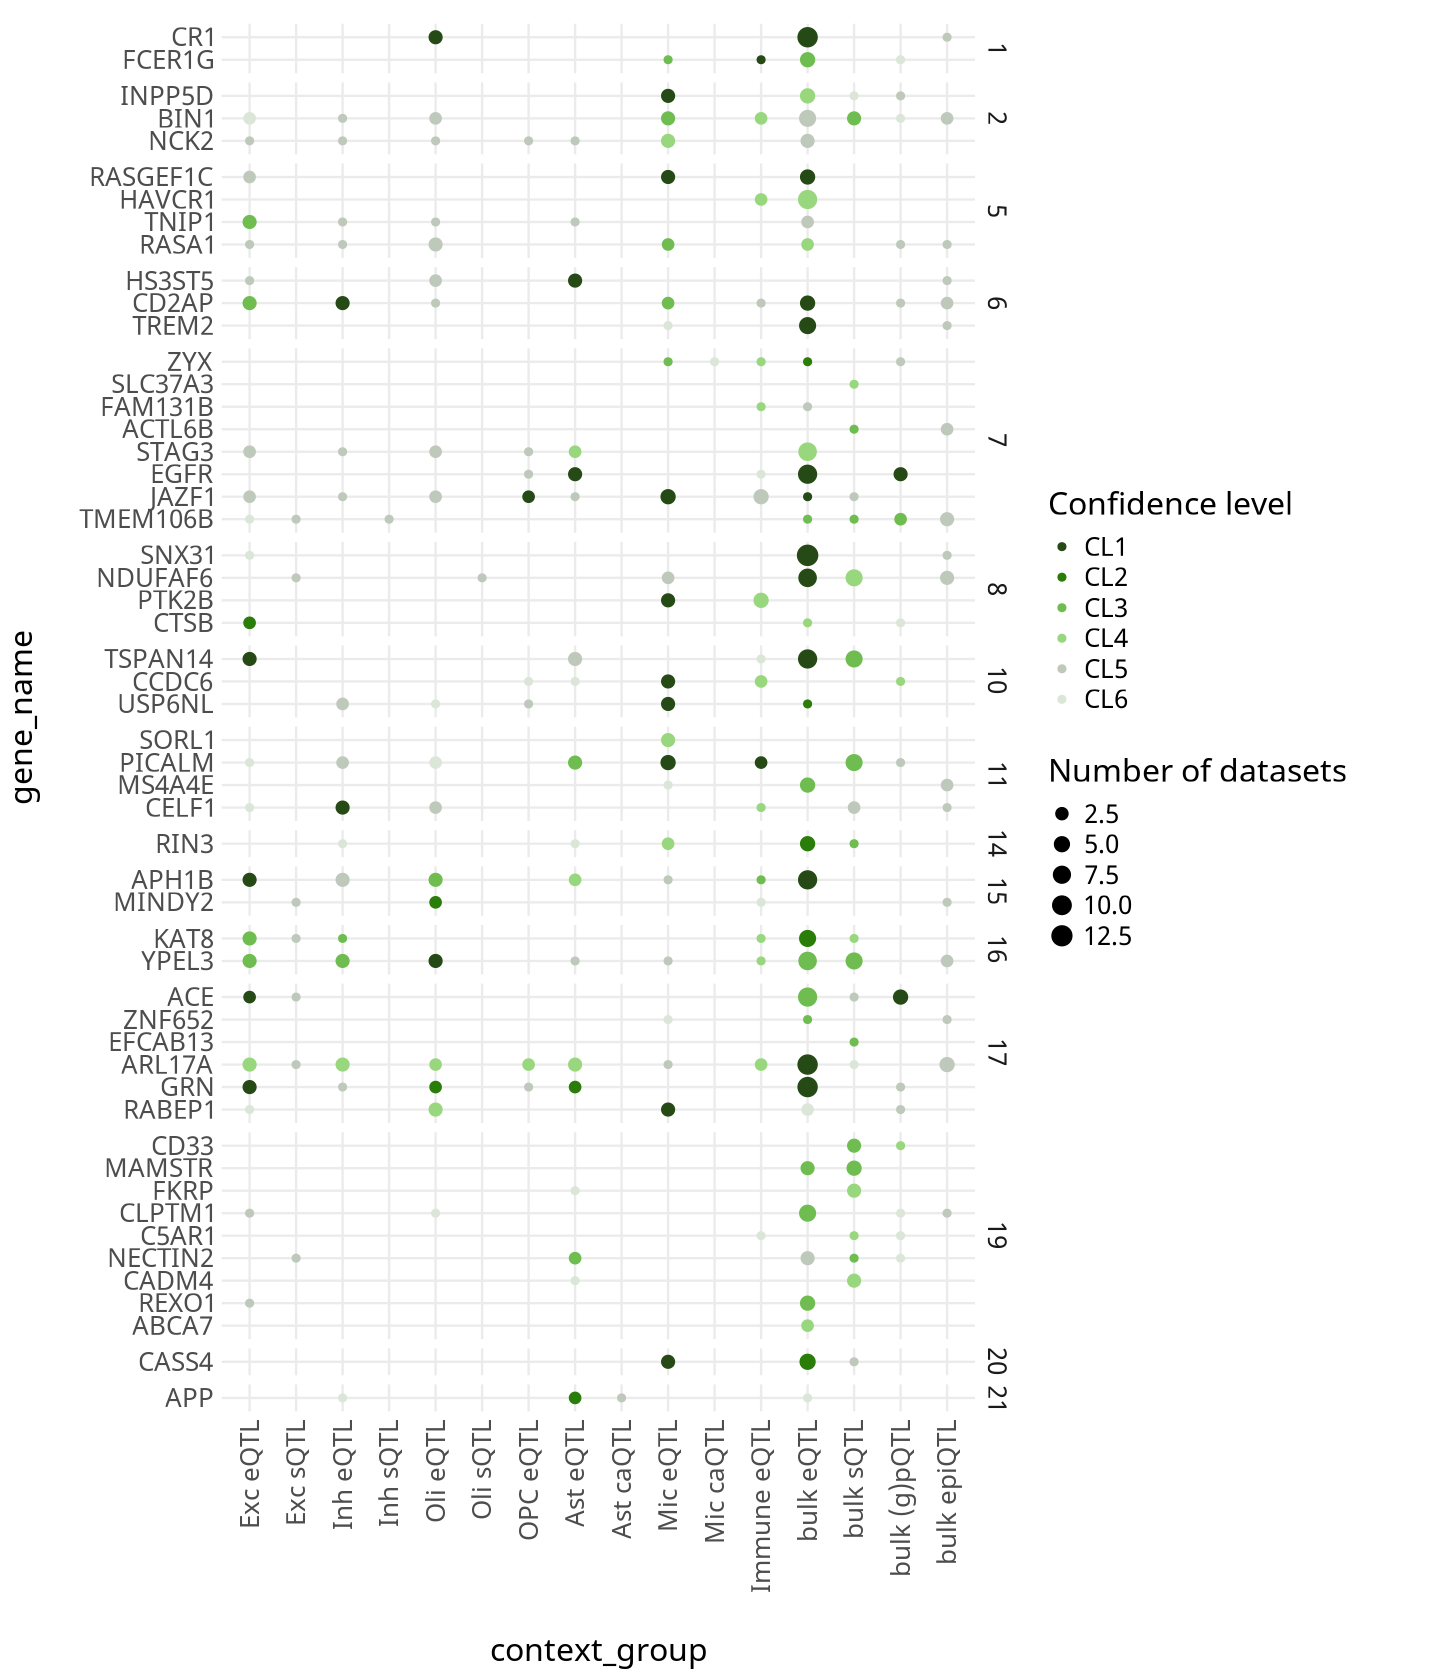

In [130]:
options(repr.plot.width = 12, repr.plot.height = 14)
p

In [131]:
# sep causal vs correlated and remove all C6
# C6 is dropped, C1/C2/C3 are called causal, and C4/C5 are called "correlative" or "correlated"
res_adxlocfge_cont_topf <- res_adxlocfge_cont_top[confidence_lvl_group != 'CL6']
res_adxlocfge_cont_topf[, confidence_cat_group := ifelse(confidence_lvl_group %in% c('CL1', "CL2", 'CL3'), 'putative causal', 'correlated')]

# add if from APOE region, or from AD by proxy only
res_adxlocfge_cont_topf[is.na(APOE_region), APOE_region := FALSE]

# Create formatting flags
res_adxlocfge_cont_topf[, is_apoe_gene := any(APOE_region), by = 'gene_name']
res_adxlocfge_cont_topf[, has_direct_evidence := !all(only_by_proxi, na.rm = TRUE), by = 'gene_name']

# Create gene_name_2 with plotmath expressions instead of HTML
res_adxlocfge_cont_topf[, gene_name_2 := as.character(gene_name)]

# Convert to plotmath expressions for formatting
res_adxlocfge_cont_topf[, gene_name_plotmath := ifelse(
  has_direct_evidence & is_apoe_gene,
  paste0("bolditalic('", gene_name, "')"),
  ifelse(has_direct_evidence,
         paste0("bold('", gene_name, "')"),
         ifelse(is_apoe_gene,
                paste0("italic('", gene_name, "')"),
                paste0("'", gene_name, "'")))
), by = 'gene_name']

#add number of GWAS
res_adxlocfge_cont_topf[, n_gwas_gene := strsplit(gwas_sources, '\\|') |> unlist() |> unique() |> length(), by = .(gene_name)]

#add number of loci and create final gene_name_4 with plotmath
res_adxlocfge_cont_topf[, gene_name_4_plotmath := ifelse(
  has_direct_evidence & is_apoe_gene,
  paste0("bolditalic('", gene_name, "')", ifelse(n_loci_gene > 1, "~'*'", ""), "~'('~", n_gwas_gene, "~')'"),
  ifelse(has_direct_evidence,
         paste0("bold('", gene_name, "')", ifelse(n_loci_gene > 1, "~'*'", ""), "~'('~", n_gwas_gene, "~')'"),
         ifelse(is_apoe_gene,
                paste0("italic('", gene_name, "')", ifelse(n_loci_gene > 1, "~'*'", ""), "~'('~", n_gwas_gene, "~')'"),
                paste0("'", gene_name, "'", ifelse(n_loci_gene > 1, "~'*'", ""), "~'('~", n_gwas_gene, "~')'")))
), by = 'gene_name']

# Create proper ordering
clean_order <- unique(res_adxlocfge_cont_topf[order(gene_name), .(gene_name, gene_name_4_plotmath)])
res_adxlocfge_cont_topf[, gene_name_4_plotmath := factor(gene_name_4_plotmath, levels = clean_order$gene_name_4_plotmath)]

In [132]:
# Create the plot with plotmath parsing
p2 <- ggplot(res_adxlocfge_cont_topf) +
  geom_point(aes(y = gene_name_4_plotmath, x = context_group,
                 size = n_study_group,
                 col = confidence_cat_group)) +
  facet_grid(chr ~ '', scales = 'free', space = 'free') +
  scale_size(range = c(1.25, 5.5), breaks = c(2, 7, 12)) +
  theme_minimal() +
  scale_x_discrete(guide = guide_axis(angle = 90)) +
  theme(text = element_text(family = "Noto Sans", size = 24),
        strip.text.x = element_text(angle = 90)) +
  labs(size = 'Number of datasets', col = 'Confidence level') +
  scale_color_manual(values = c('cyan3', 'red')) +
  theme(axis.title.y = element_blank()) +
  scale_y_discrete(labels = function(x) parse(text = x))

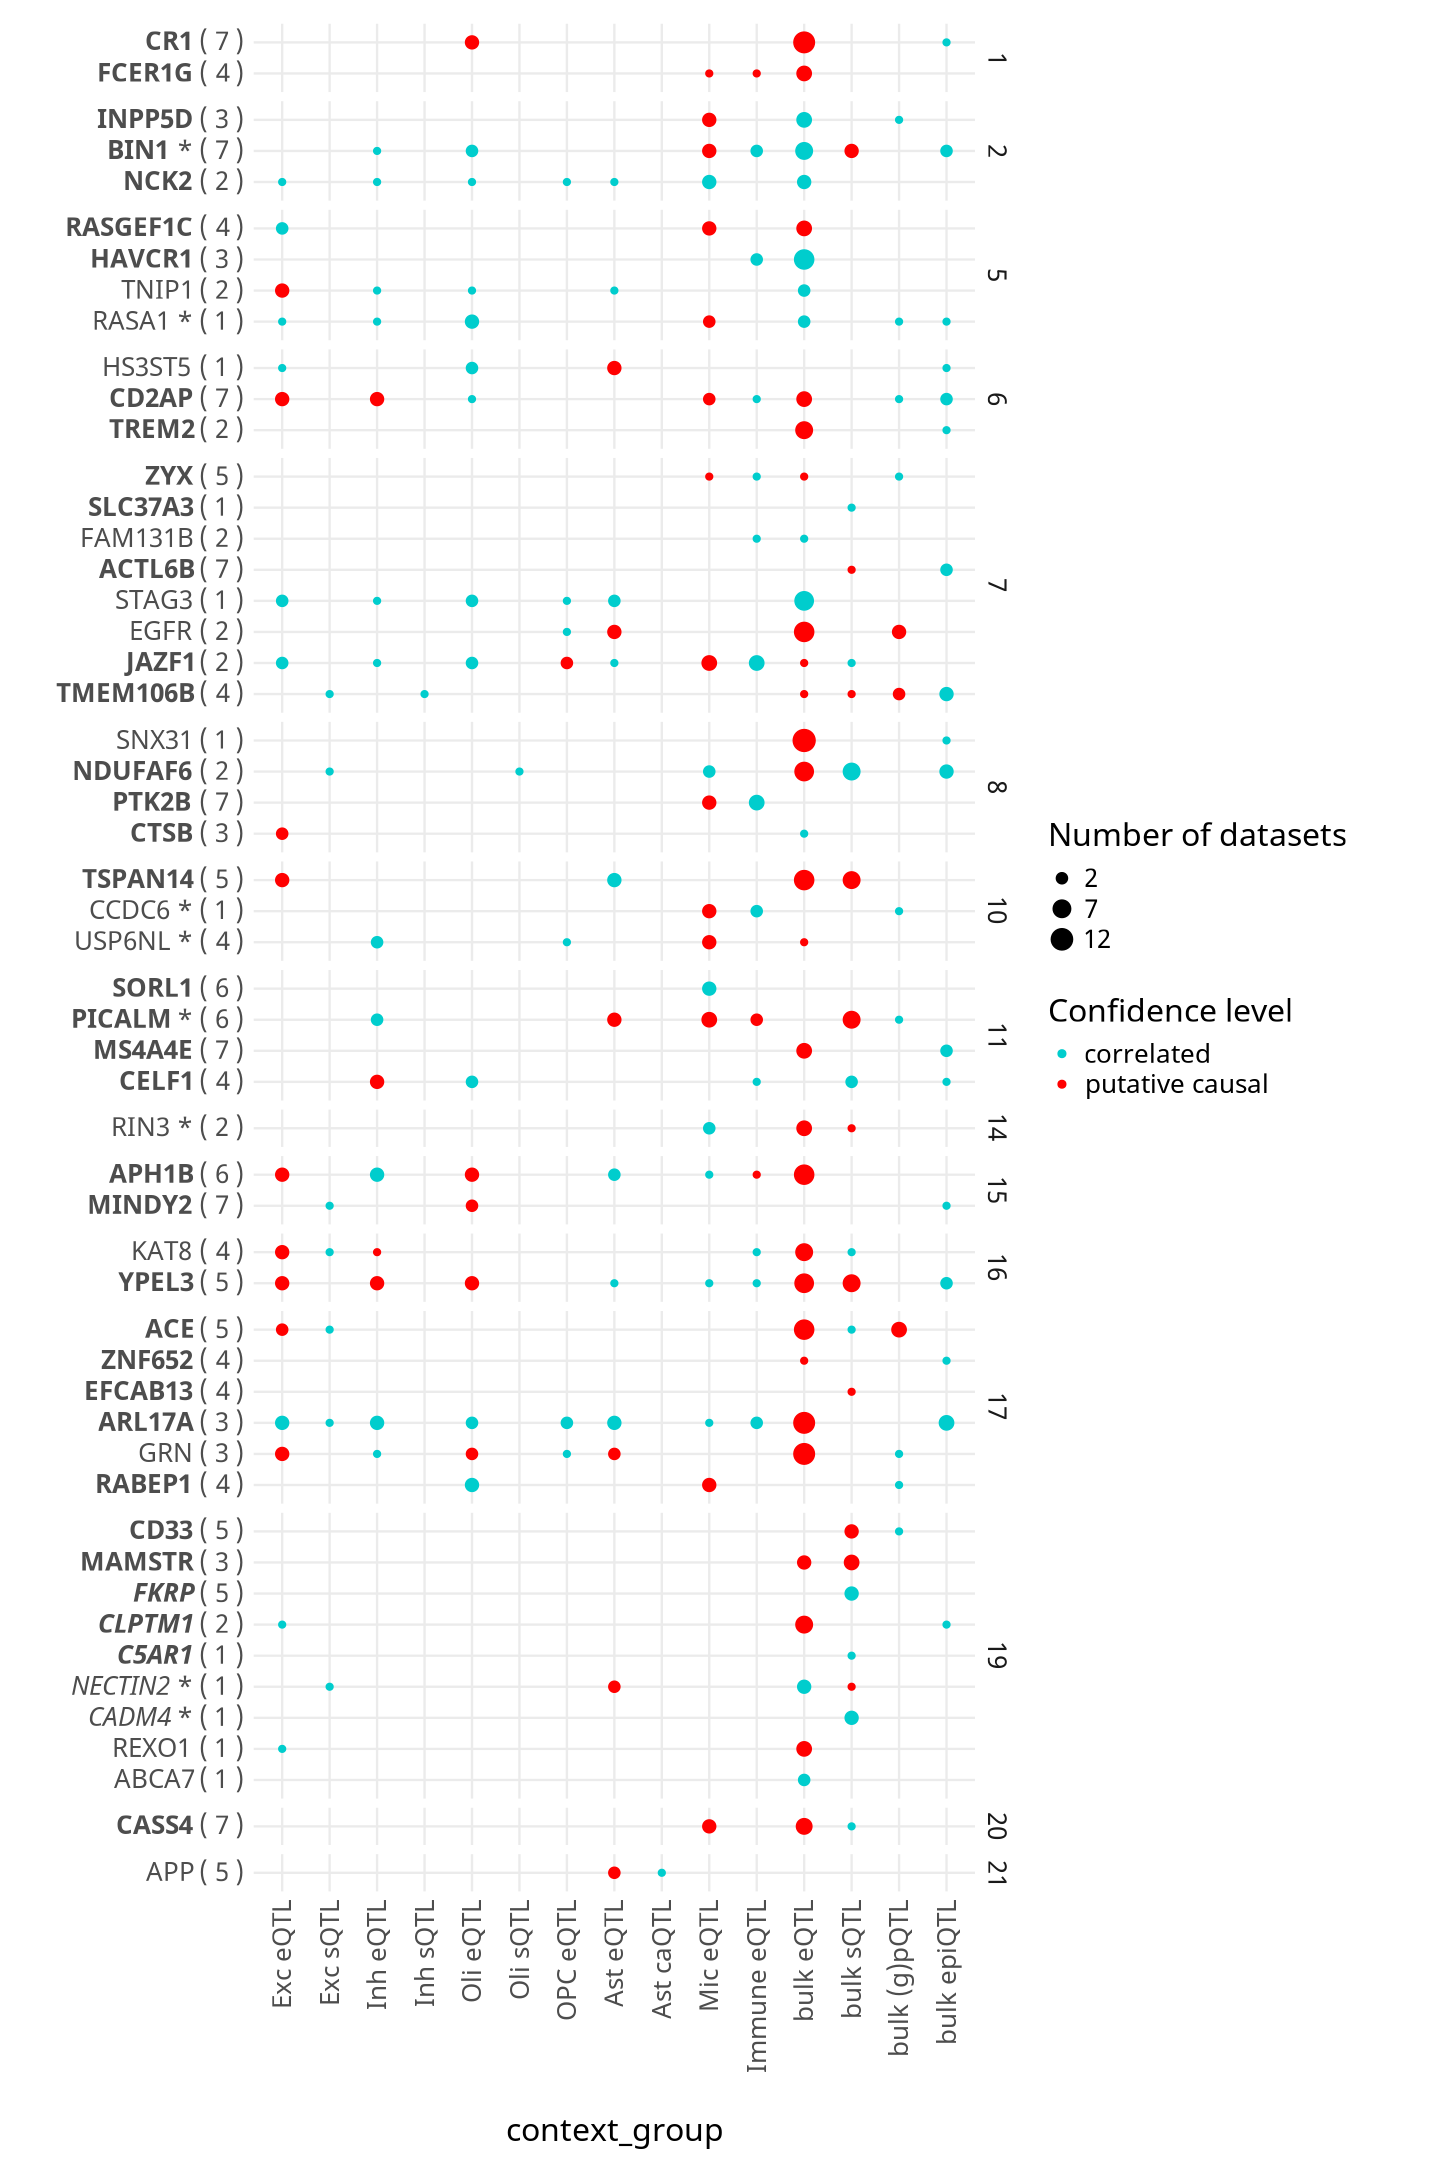

In [133]:
options(repr.plot.width = 12, repr.plot.height = 18)
p2

In [134]:
# sep in 3categories
res_adxlocfge_cont_topf[,confidence_cat_group2:=ifelse(confidence_lvl_group%in%c('CL1',"CL2"),'Putative causal (CL1, CL2)',ifelse(confidence_lvl_group=='CL3','Putative causal (CL3)','Associated'))]
res_adxlocfge_cont_topf[,confidence_cat_group2:=factor(confidence_cat_group2,levels = c('Putative causal (CL1, CL2)','Putative causal (CL3)','Associated'))]

res_adxlocfge_cont_topf_3 <- res_adxlocfge_cont_topf

p3 <- ggplot(res_adxlocfge_cont_topf_3) +
  geom_point(aes(y=gene_name_4_plotmath, x=context_group,  # Use plotmath version
                 size=n_study_group,
                 col=confidence_cat_group2)) +
  facet_grid(chr~'',scales = 'free',space = 'free')+
  scale_size(range = c(1.25,5.5),breaks = c(2,7,12))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(text = element_text(family = "Noto Sans", size = 24),
        strip.text.x = element_text(angle = 90))+
  labs(size='Number of datasets',col='Confidence level')+
  scale_color_manual(values = c('brown1','deepskyblue4','darkseagreen3')) + 
  theme(axis.title.y = element_blank()) +
  scale_y_discrete(labels = function(x) parse(text = x))  # Use parse instead of element_markdown

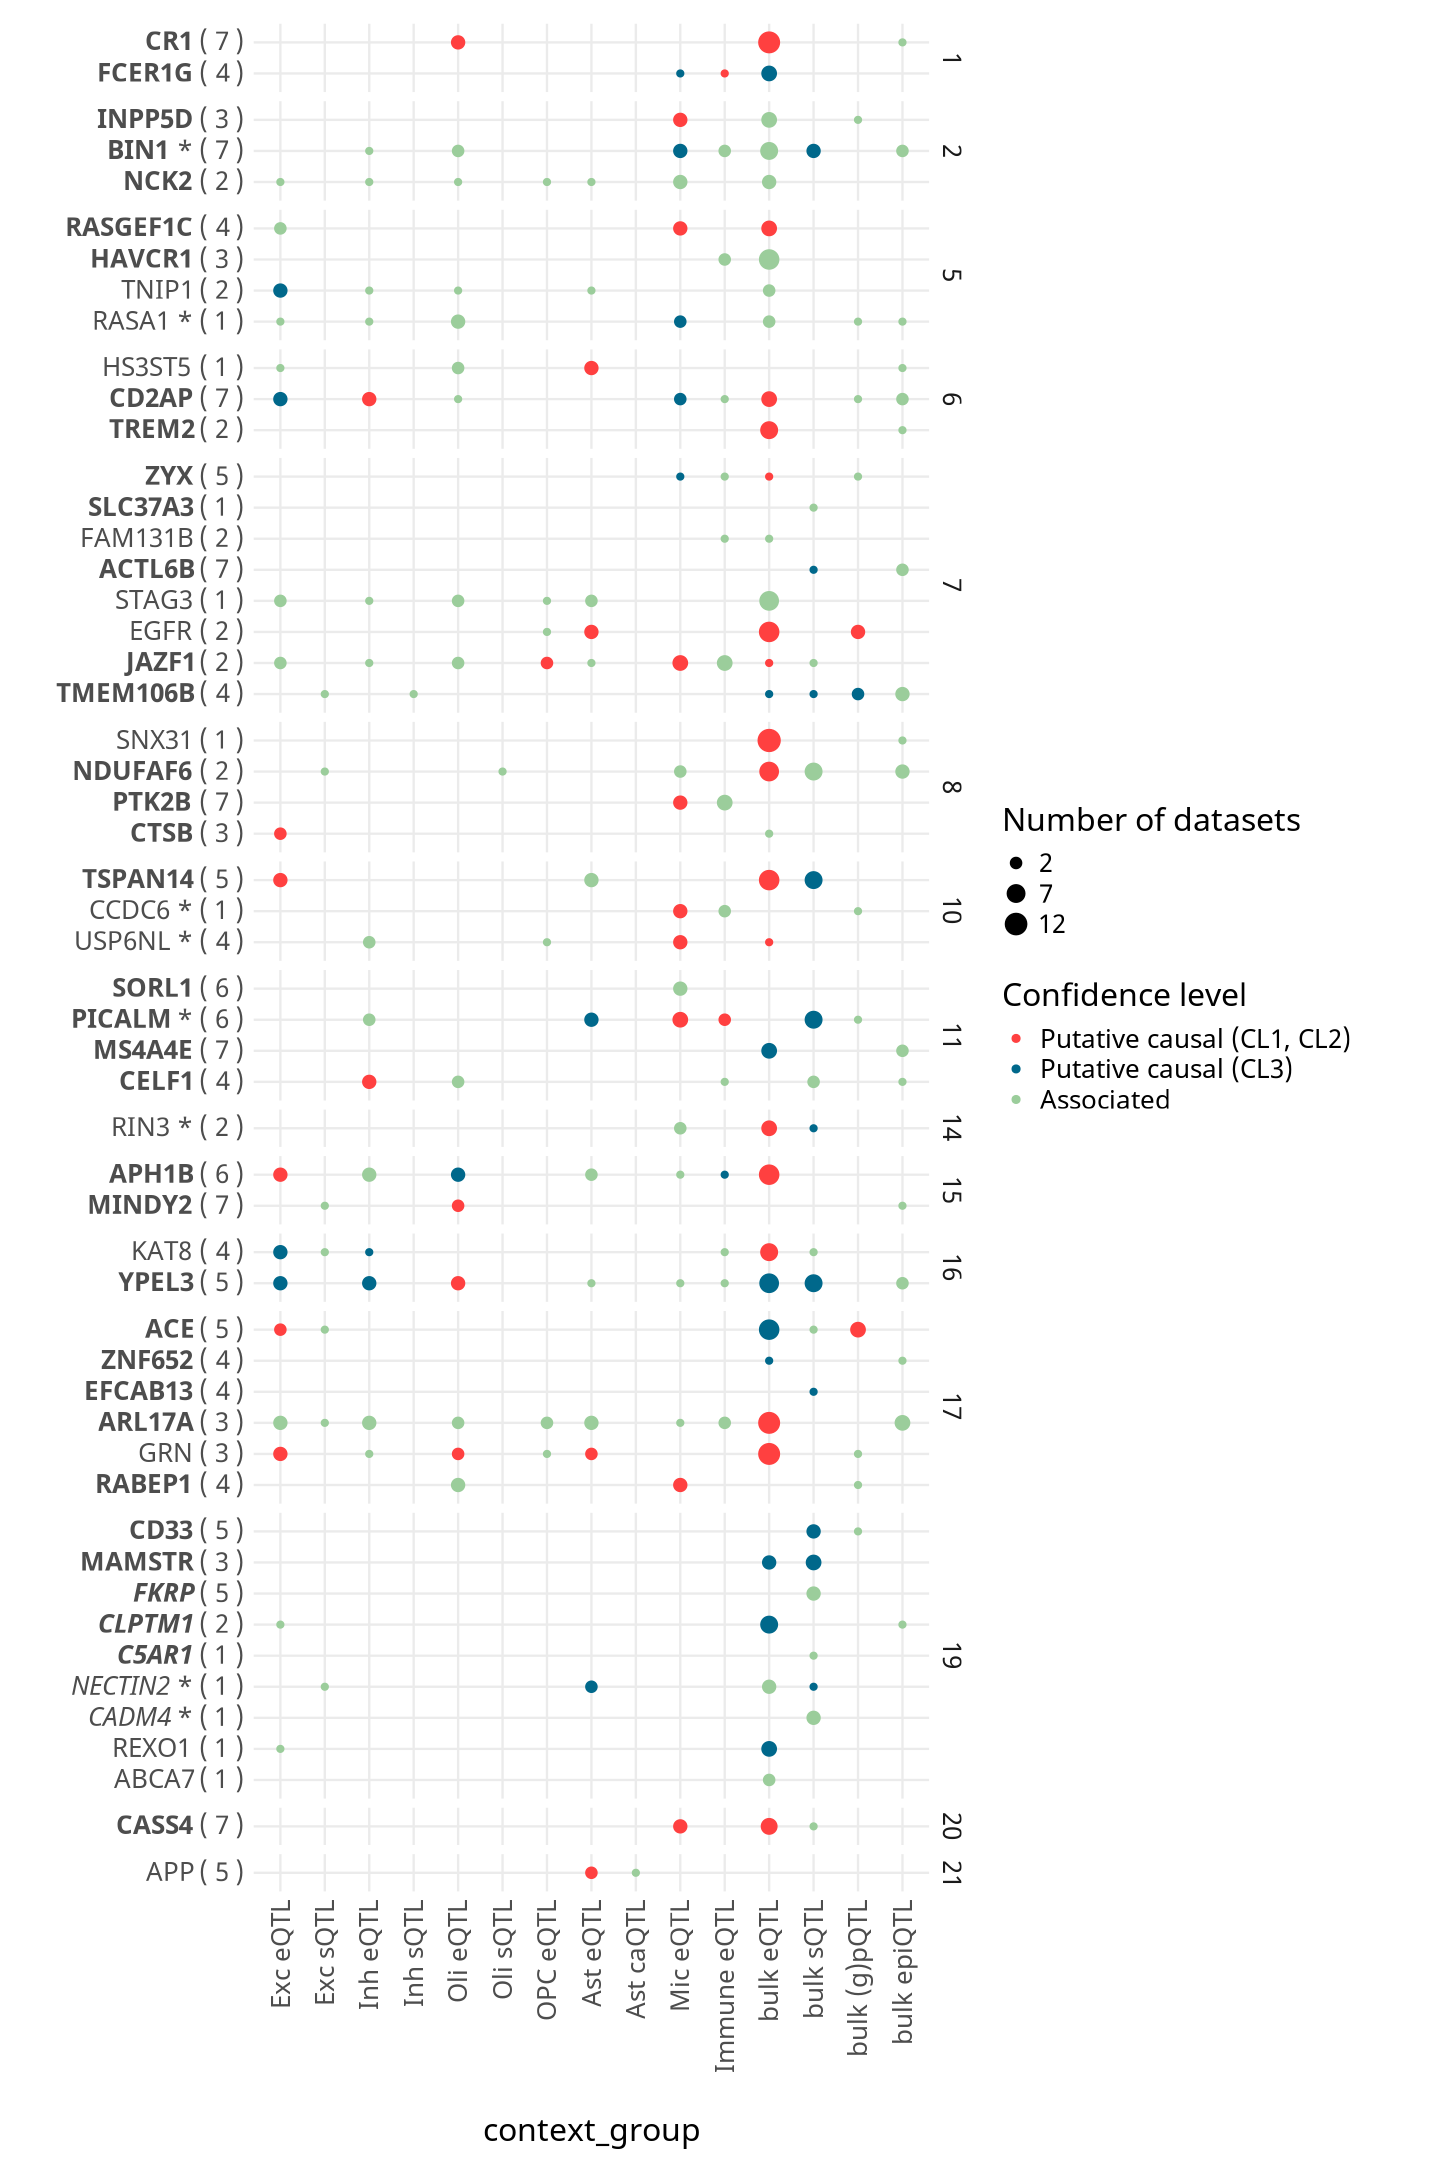

In [135]:
options(repr.plot.width = 12, repr.plot.height = 18)
p3